In [18]:
#The design of the process is as follows:
# 1.Preprocess the data ie correct-->normalize-->transform-->reshape to proper dimensions-->split data trn/val/test
# 2.Specify the model-->build model-->check dimensions
# 3.Loss function
# 4.gradient descent, check using numerical gradient
# 5.run loop to minimize the loss-->chk model by using right measurement metrics
# 6.Update hyperparameters -->Test on test

In [19]:
#loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [20]:
#Preprocessing data -- loading data
digits = datasets.load_digits()
X_data = digits.data
Y_data = digits.target

In [21]:
#Preprocessing data -- Split the data into train and test
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=42)
for train_index,test_index in split.split(X_data,Y_data):
    X_train = X_data[train_index].T
    X_test = X_data[test_index].T
    Y_train = Y_data[train_index].T.reshape((-1,1))#reshaping to a vector
    Y_test = Y_data[test_index].T.reshape((-1,1))

#Preprocessing data -- Hotonecoding the Y to be able to use softmax function loss
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
Y_train = lb.fit_transform(Y_train).T
Y_test = lb.fit_transform(Y_test).T

In [45]:
#Setting up the model specifics
#creating a softmax model only
#logits = WX+B
#softmax = exp(logits)/sum(exp(logits))
#loss = (ylog(yhat)) +(1-y)log(1-yhat)

#creating helper functions

def linear_fn(W,X,b):
    logits = np.dot(W,X)+b
    return logits

def softmax_fn(Z):
    smax = np.exp(Z)/np.sum(np.exp(Z),axis=0)
    return smax

#initialize parameters and variables
learning_rate = 0.01
m = X_train.shape[1]
iterations = 3000

W = np.random.randn(10,64)*0.1
b = np.zeros((10,1))

costs = []
accuracys = []
for i in range(0,iterations):
#Forward pass to calculate model and cost
    logits = linear_fn(W,X_train,b)
    softmax = softmax_fn(logits)

    loss = (Y_train*np.log(softmax)+(1-Y_train)*(np.log(1-softmax)))
    cost = (-1.0/m)*(np.sum(loss,keepdims=True))

#backpass
    dW = (1.0/m)*np.dot((softmax-Y_train),(X_train.T))
    db = (1.0/m)*np.sum((softmax - Y_train),axis=1).reshape(10,1)
    W = W -learning_rate*dW
    b = b -learning_rate*db
    costs.append(cost)
#predictions
    prediction = np.dot(W,X_test)+b
    pred_softmax = np.exp(prediction)/np.sum(np.exp(prediction),axis=0)
    pred_index=np.argmax(pred_softmax,axis=0).reshape(-1,1)
    Y_test_index = np.argmax(Y_test,axis=0).reshape(-1,1)
    accuracy = sum(np.equal(pred_index,Y_test_index))/(X_test.shape[1]*1.)
    accuracys.append(accuracy)

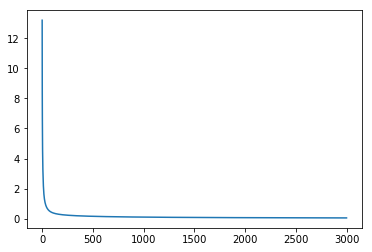

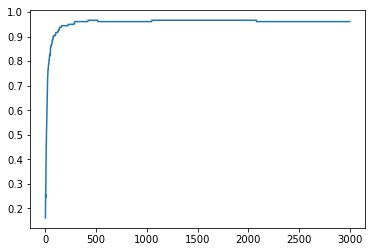

In [46]:
#Plotting the loss 
plt.plot(np.array(costs).reshape(-1,1))
plt.show()
#Plotting the accuracy
plt.plot(np.array(accuracys).reshape(-1,1))
plt.show()


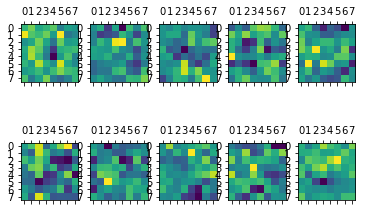

In [47]:
#Visualizing the parameters in the last layer
fig,arr = plt.subplots(2,5)
arr[0,0].matshow(W[0].reshape(8,8))
arr[0,1].matshow(W[1].reshape(8,8))
arr[0,2].matshow(W[2].reshape(8,8))
arr[0,3].matshow(W[3].reshape(8,8))
arr[0,4].matshow(W[4].reshape(8,8))
arr[1,0].matshow(W[5].reshape(8,8))
arr[1,1].matshow(W[6].reshape(8,8))
arr[1,2].matshow(W[7].reshape(8,8))
arr[1,3].matshow(W[8].reshape(8,8))
arr[1,4].matshow(W[9].reshape(8,8))
plt.show()